In [94]:
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

EPOCHS = 40
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43 #43 in big data-set
TEST_SIZE = 0.4 #.4 in big data-set

In [64]:
def load_data(data_dir):
    """
    Load image data from directory `data_dir`.

    Assume `data_dir` has one directory named after each category, numbered
    0 through NUM_CATEGORIES - 1. Inside each category directory will be some
    number of image files.

    Return tuple `(images, labels)`. `images` should be a list of all
    of the images in the data directory, where each image is formatted as a
    numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. `labels` should
    be a list of integer labels, representing the categories for each of the
    corresponding `images`.
    """
    import progressbar
    from time import sleep

    # bar = progressbar.ProgressBar(maxval=150, widgets=[progressbar.Bar('=', '[', ']'), ' ', progressbar.Percentage()])
    images = []
    labels = []
    for repo in os.listdir(data_dir)[1:]:
        print(f"working on repo: {repo}")
        for img in os.listdir(os.path.join(data_dir,repo)):
            temp = cv2.imread(os.path.join(data_dir,repo,img))
            temp = tf.image.convert_image_dtype(temp, tf.float32)
            temp = tf.image.resize(temp, (30,30))
            # temp = temp/255
            if temp.shape != (30,30,3):
                print(temp.shape)
            images.append(temp)
            labels.append(int(repo))
            
    return (images, labels)

In [65]:
images, labels = load_data('./train/')

working on repo: 1
working on repo: 10
working on repo: 11
working on repo: 12
working on repo: 13
working on repo: 14
working on repo: 15
working on repo: 16
working on repo: 17
working on repo: 18
working on repo: 19
working on repo: 2
working on repo: 20
working on repo: 21
working on repo: 22
working on repo: 23
working on repo: 24
working on repo: 25
working on repo: 26
working on repo: 27
working on repo: 28
working on repo: 29
working on repo: 3
working on repo: 30
working on repo: 31
working on repo: 32
working on repo: 33
working on repo: 34
working on repo: 35
working on repo: 36
working on repo: 37
working on repo: 38
working on repo: 39
working on repo: 4
working on repo: 40
working on repo: 41
working on repo: 42
working on repo: 5
working on repo: 6
working on repo: 7
working on repo: 8
working on repo: 9


In [66]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    model = tf.keras.models.Sequential([
        #convolution layer with 32 filters using a 3x3 kernel
        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu",input_shape=(30,30,3)
        ),

        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu"
        ),

        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        tf.keras.layers.Conv2D(
            32, (3, 3), activation="relu"
        ),

        # Max-pooling layer, using 2x2 pool size
        tf.keras.layers.MaxPooling2D(pool_size=(2,2)),

        #flatten units
        tf.keras.layers.Flatten(),

        #Add a hidden layer without dropout
        tf.keras.layers.Dense(512, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),

        #Add an output layer with output units for all (43 for large dataset) 3 categories
        tf.keras.layers.Dense(NUM_CATEGORIES, activation="softmax")
    ])

    model.compile(
        optimizer = "adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

38999 38999
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


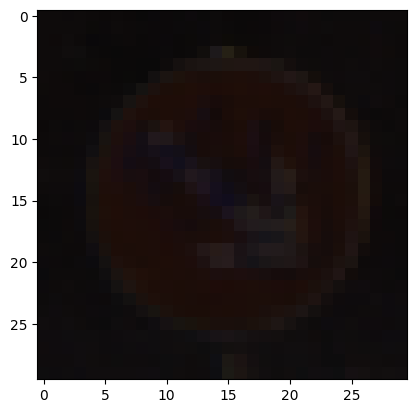

In [83]:
print(len(images), len(labels))
print(labels[29000])
plt.imshow(images[29000])
plt.show()

In [72]:
# Split data into training and testing sets
labels = tf.keras.utils.to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(
    np.array(images), np.array(labels), test_size=TEST_SIZE
)

(38999, 43)

In [95]:
# Get a compiled neural network
model = get_model()

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
# Fit model on training data
model.fit(x_train, y_train, epochs=EPOCHS)

# Evaluate neural network performance
model.evaluate(x_test,  y_test, verbose=2)

# Save model to file
# if len(sys.argv) == 3:
filename = 'saved_model'
model.save(filename)
print(f"Model saved to {filename}.")

(23399, 30, 30, 3) (23399, 43) (15600, 30, 30, 3) (15600, 43)
Epoch 1/40
732/732 [==============================] - 6s 7ms/step - loss: 2.2215 - accuracy: 0.3518
Epoch 2/40
732/732 [==============================] - 5s 7ms/step - loss: 0.8185 - accuracy: 0.7303
Epoch 3/40
732/732 [==============================] - 5s 7ms/step - loss: 0.3868 - accuracy: 0.8772
Epoch 4/40
732/732 [==============================] - 5s 7ms/step - loss: 0.2442 - accuracy: 0.9233
Epoch 5/40
732/732 [==============================] - 5s 7ms/step - loss: 0.1715 - accuracy: 0.9478
Epoch 6/40
732/732 [==============================] - 5s 7ms/step - loss: 0.1334 - accuracy: 0.9582
Epoch 7/40
732/732 [==============================] - 5s 7ms/step - loss: 0.1165 - accuracy: 0.9655
Epoch 8/40
732/732 [==============================] - 5s 7ms/step - loss: 0.0811 - accuracy: 0.9759
Epoch 9/40
732/732 [==============================] - 5s 7ms/step - loss: 0.0777 - accuracy: 0.9772
Epoch 10/40
732/732 [=================

INFO:tensorflow:Assets written to: saved_model/assets


INFO:tensorflow:Assets written to: saved_model/assets


Model saved to saved_model.


14


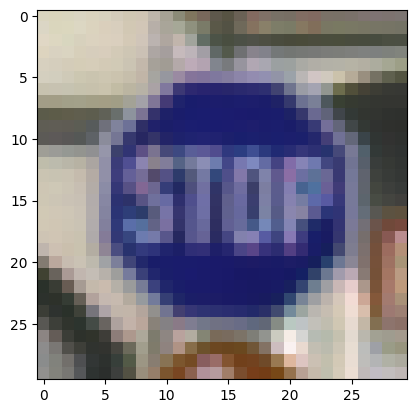

In [96]:
print(labels[10000].argmax())
plt.imshow(images[10000])